Enter keyword for which you want sentiment:google


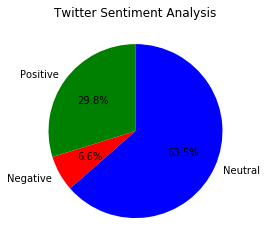

In [17]:
import re 
import tweepy 
from tweepy import OAuthHandler 
from textblob import TextBlob 
  
class TwitterClient(object): 
    ''' 
    Generic Twitter Class for sentiment analysis. 
    '''
    def __init__(self): 
        ''' 
        Class constructor or initialization method. 
        '''
        # keys and tokens from the Twitter Dev Console 
        #Change key and tokens
        consumer_key = 'jtV5qWrVS2wOuggz9rlGShV9e5h'
        consumer_secret = 'NlqbI1b1EVntKAjUdwJI2dgdrhzsNQ7nBIbKfSXogVcfGyJIHqou0E'
        access_token = '120993122-pfDQz81VurocYfgdfgdfgdfILV6fi8IqBMOJXGCwTdNcY8ALAI'
        access_token_secret = 'B1i5fufBkoQdSRai5ifdfdddfp7VS1qcRNwQBKL1VLbWYxtQ0WIX'
  
        # attempt authentication 
        try: 
            # create OAuthHandler object 
            self.auth = OAuthHandler(consumer_key, consumer_secret) 
            # set access token and secret 
            self.auth.set_access_token(access_token, access_token_secret) 
            # create tweepy API object to fetch tweets 
            self.api = tweepy.API(self.auth) 
        except: 
            print("Error: Authentication Failed") 
  
    def clean_tweet(self, tweet): 
        ''' 
        Utility function to clean tweet text by removing links, special characters 
        using simple regex statements. 
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split()) 
  
    def get_tweet_sentiment(self, tweet): 
        ''' 
        Utility function to classify sentiment of passed tweet 
        using textblob's sentiment method 
        '''
        # create TextBlob object of passed tweet text 
        analysis = TextBlob(self.clean_tweet(tweet)) 
        # set sentiment 
        if analysis.sentiment.polarity > 0: 
            return 'positive'
        elif analysis.sentiment.polarity == 0: 
            return 'neutral'
        else: 
            return 'negative'
  
    def get_tweets(self, query, count = 10): 
        ''' 
        Main function to fetch tweets and parse them. 
        '''
        # empty list to store parsed tweets 
        tweets = [] 
  
        try: 
            # call twitter api to fetch tweets 
            fetched_tweets = self.api.search(q = query, count = count) 
  
            # parsing tweets one by one 
            for tweet in fetched_tweets: 
                # empty dictionary to store required params of a tweet 
                parsed_tweet = {} 
  
                # saving text of tweet 
                parsed_tweet['text'] = tweet.text 
                # saving sentiment of tweet 
                parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text) 
  
                # appending parsed tweet to tweets list 
                if tweet.retweet_count > 0: 
                    # if tweet has retweets, ensure that it is appended only once 
                    if parsed_tweet not in tweets: 
                        tweets.append(parsed_tweet) 
                else: 
                    tweets.append(parsed_tweet) 
  
            # return parsed tweets 
            return tweets 
  
        except tweepy.TweepError as e: 
            # print error (if any) 
            print("Error : " + str(e)) 
  
def main(): 
    # creating object of TwitterClient Class 
    api = TwitterClient() 
    # calling function to get tweets 
    data=input("Enter keyword for which you want sentiment:")
    tweets = api.get_tweets(query = data, count = 200) 
  
    # picking positive tweets from tweets 
    ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive'] 
    # percentage of positive tweets 
    #print("Positive tweets percentage:",100*len(ptweets)/len(tweets)) 
    # picking negative tweets from tweets 
    ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative'] 
    # percentage of negative tweets 
    #print("Negative tweets percentage:",100*len(ntweets)/len(tweets)) 
    # percentage of neutral tweets 
    pos=100*len(ptweets)/len(tweets)
    neg=100*len(ntweets)/len(tweets)
    neu=100*(len(tweets)-pos-neg)/len(tweets)
    import matplotlib.pyplot as plt
    slices_hours = [pos,neg,neu]
    activities = ['Positive', 'Negative','Neutral']
    colors = ['g', 'r','b']
    plt.pie(slices_hours, labels=activities, colors=colors, startangle=90, autopct='%.1f%%')
    plt.title('Twitter Sentiment Analysis')
    #print("Neutral tweets percentage:",100*(len(tweets)-pos-neg)/len(tweets)) 
  
    # printing first 5 positive tweets 
    #print("Positive tweets:") 
    for tweet in ptweets[:10]: 
        #print(tweet['text']) 
        pass
  
    # printing first 5 negative tweets 
    #print("Negative tweets:") 
    for tweet in ntweets[:10]:
        pass
        #print(tweet['text']) 
    plt.show()
if __name__ == "__main__": 
    # calling main function 
    main() 
    
